In [1]:
#IMPORTIING LIBRARIES
import pandas as pd
import numpy as np

In [2]:
#READING THE DATA
df = pd.read_csv('Superstore.csv')

In [3]:
#TOP 5 ROWS FROM DATA
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
#ROWS AND COLUMNS COUNT 
df.shape

(9994, 21)

In [5]:
#DROP THE UNNECCESARY COLUMNS FROM THE DATA
df.drop(columns=["Row ID", "Country", "Customer Name"], inplace=True)

In [6]:
#ROWS AND COLUMNS COUNT AFTER DELETING THE COLUMNS
df.shape

(9994, 18)

In [7]:
#MAKING NEW COLUMNS BY SUBSETUTING THE ORDER_DATE AND SHIP DATE
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [8]:
df['delivery_time'] = df['Ship Date'] - df['Order Date']

In [9]:
df['delivery_time']=df['delivery_time'].astype(str)
df['delivery_time']=df['delivery_time'].str.replace('days','').astype(int).abs()

In [10]:
#DROPPING THE ORDER_DATE AND SHIP_DATE FROM THE DATA
df.drop(columns=['Order Date','Ship Date'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Ship Mode      9994 non-null   object 
 2   Customer ID    9994 non-null   object 
 3   Segment        9994 non-null   object 
 4   City           9994 non-null   object 
 5   State          9994 non-null   object 
 6   Postal Code    9994 non-null   int64  
 7   Region         9994 non-null   object 
 8   Product ID     9994 non-null   object 
 9   Category       9994 non-null   object 
 10  Sub-Category   9994 non-null   object 
 11  Product Name   9994 non-null   object 
 12  Sales          9994 non-null   float64
 13  Quantity       9994 non-null   int64  
 14  Discount       9994 non-null   float64
 15  Profit         9994 non-null   float64
 16  delivery_time  9994 non-null   int64  
dtypes: float64(3), int64(3), object(11)
memory usage: 1.

In [12]:
#IMPORTING THE MATPLOTLIB AND SEABORN FOR INSIGHTS
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='delivery_time', ylabel='Count'>

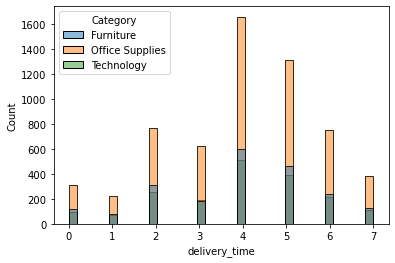

In [13]:
sns.histplot(data=df, x="delivery_time", hue="Category")

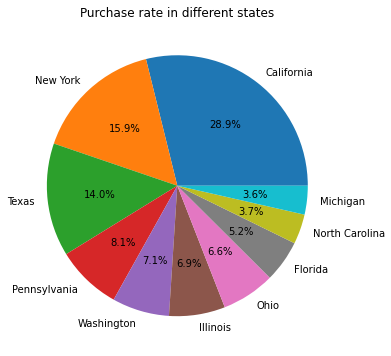

In [14]:
#CREATING A PIE CHART FOR PURCHASE RATE IN DIFFERENT STATES OF US
temp=pd.DataFrame(df.groupby('State')['Quantity'].sum().reset_index())
temp=temp.sort_values('Quantity', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10,6))
ax.pie(temp['Quantity'], labels=temp['State'], autopct='%1.1f%%')

ax.set_title('Purchase rate in different states')

plt.show()

In [337]:
df.groupby('State')['City'].value_counts().head(20)

State    City        
Alabama  Decatur         13
         Mobile          11
         Huntsville      10
         Montgomery      10
         Auburn           6
         Florence         5
         Hoover           4
         Tuscaloosa       2
Arizona  Phoenix         63
         Tucson          32
         Mesa            28
         Glendale        23
         Peoria          16
         Gilbert         15
         Tempe           13
         Scottsdale      12
         Chandler         7
         Avondale         6
         Yuma             4
         Sierra Vista     3
Name: City, dtype: int64

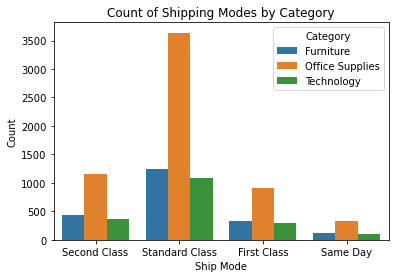

In [338]:
#COUNT OF SHIPPING MODEplt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ship Mode', hue='Category')
plt.title('Count of Shipping Modes by Category')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()


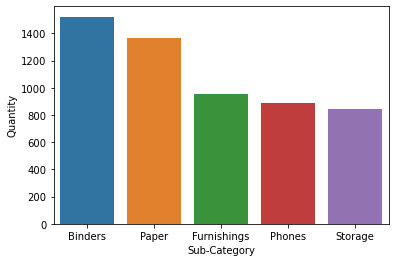

In [339]:
#COUNT OF TOP 5 SUB-CATEGORY FROM THE DATA
sns.barplot(data=df.groupby("Sub-Category")["Quantity"].count().sort_values(ascending=False).head(5).reset_index(), x="Sub-Category", y="Quantity")

plt.show()

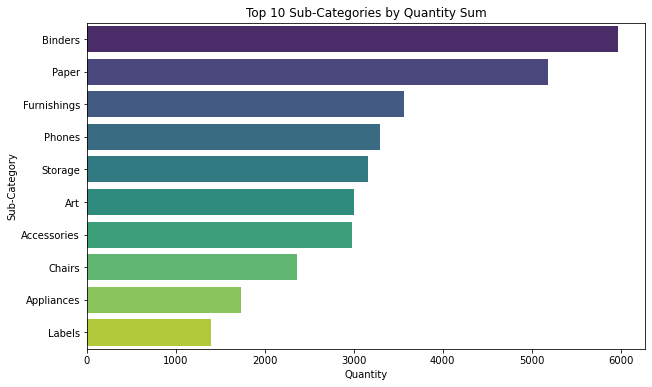

In [340]:
#THE BAR GRAPH FOR TOP 10 SUB-CATEGORY
temp = df.groupby('Sub-Category').sum()['Quantity'].reset_index()
temp = temp.sort_values('Quantity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=temp, x='Quantity', y='Sub-Category', palette='viridis')
plt.title('Top 10 Sub-Categories by Quantity Sum')
plt.xlabel('Quantity')
plt.ylabel('Sub-Category')
plt.show()

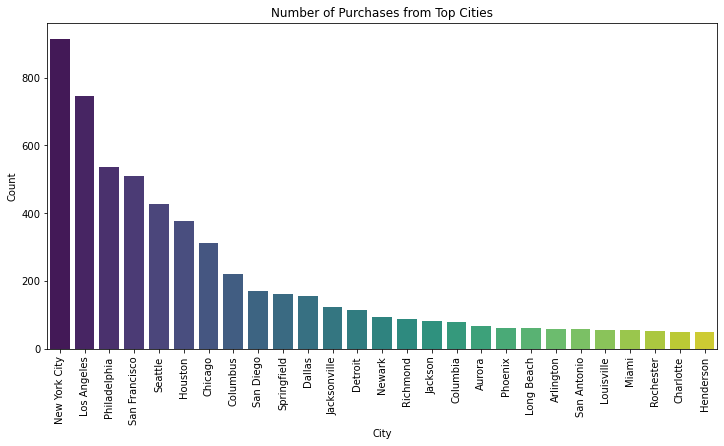

In [341]:
#TOP CITIES WITH NUMBER OF PURCHASE COUNT > 50
top_cities = df['City'].value_counts().rename_axis('City').reset_index(name='Count')
top_cities = top_cities[top_cities['Count'] > 50]
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='City', y='Count', palette='viridis')
plt.xticks(rotation='vertical')
plt.title('Number of Purchases from Top Cities')
plt.show()

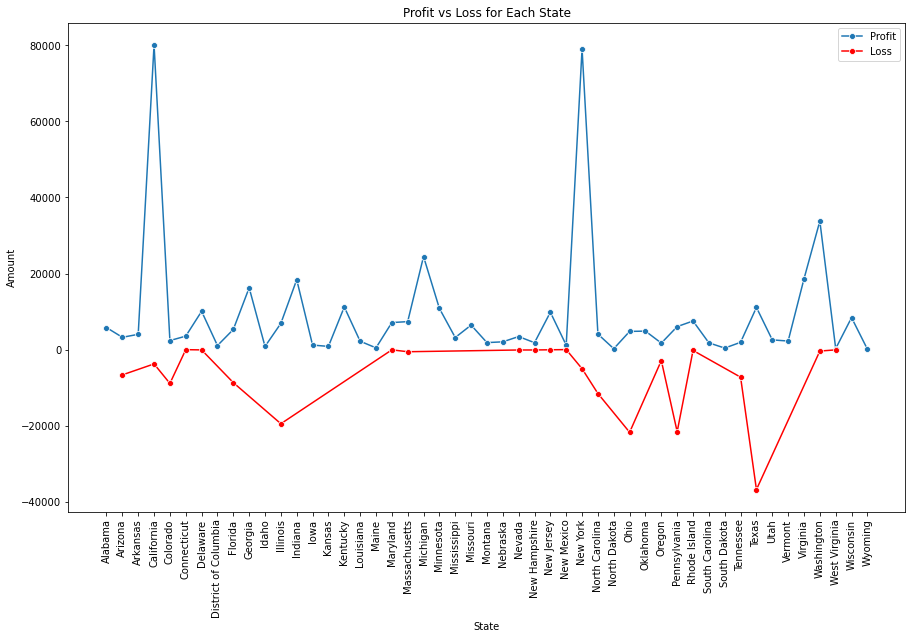

In [342]:
#PROFIT VS LOSS FOR STATE
profits = df[df['Profit'] > 0].groupby('State')['Profit'].sum().reset_index()
losses = df[df['Profit'] < 0].groupby('State')['Profit'].sum().reset_index()

plt.figure(figsize=(15, 9))
sns.lineplot(data=profits, x='State', y='Profit', label='Profit', marker='o')
sns.lineplot(data=losses, x='State', y='Profit', label='Loss', color='red', marker='o')
plt.xticks(rotation='vertical')
plt.title('Profit vs Loss for Each State')
plt.ylabel('Amount')
plt.legend()
plt.show()

### Corelation

<AxesSubplot:>

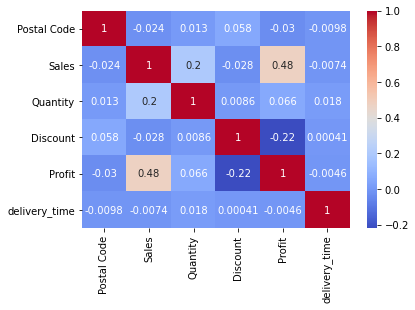

In [343]:
# Selecting numeric data to calculate correlation
df_numeric = df.select_dtypes(include='number')
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')

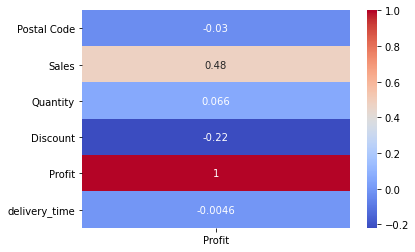

In [344]:
label = ['Postal Code','Sales', 'Quantity','Discount','Profit','delivery_time']
sns.heatmap(df_numeric.corr()['Profit'].values.reshape(-1, 1), annot=True, cmap='coolwarm', yticklabels=label, xticklabels=['Profit'])
plt.show()

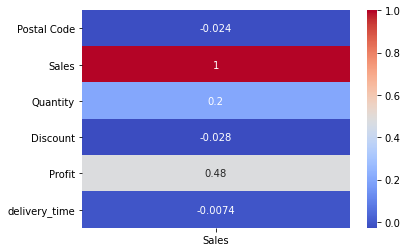

In [345]:
label = ['Postal Code','Sales', 'Quantity','Discount','Profit','delivery_time']
sns.heatmap(df_numeric.corr()['Sales'].values.reshape(-1, 1), annot=True, cmap='coolwarm', yticklabels=label, xticklabels=['Sales'])
plt.show()

# Price

In [346]:
#MAKING NEW COLUMNS 
df['cost price'] = (df['Sales'] - df['Profit'])/df['Quantity']
df['Price(before discount)'] = df['cost price'] + (df['cost price'] * df['Discount'])

In [347]:
#DROPPING THE SALES COLUMN
df.drop('Sales', axis=1, inplace=True)

In [348]:
p_df=df.copy()

In [349]:
df = p_df.copy()
df

,Order ID,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,delivery_time,cost price,Price(before discount)
0,CA-2016-152156,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,2,0.00,41.9136,3,110.0232,110.023200
1,CA-2016-152156,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3,0.00,219.5820,3,170.7860,170.786000
2,CA-2016-138688,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2,0.00,6.8714,4,3.8743,3.874300
3,US-2015-108966,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,5,0.45,-383.0310,7,268.1217,388.776465
4,US-2015-108966,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2,0.20,2.5164,7,9.9258,11.910960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,Second Class,TB-21400,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,3,0.20,4.1028,2,7.0484,8.458080
9990,CA-2017-121258,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,2,0.00,15.6332,5,38.1634,38.163400
9991,CA-2017-121258,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,2,0.20,19.3932,5,119.5914,143.509680
9992,CA-2017-121258,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",4,0.00,13.3200,5,4.0700,4.070000


In [350]:
#CHECKING THE UNIQUE VALUE COUNT FROM THE COLUMNS 
print(df['Product Name'].unique().shape)
print(df['Postal Code'].unique().shape)

(1850,)
(631,)


In [351]:
df['Product Name'] = df['Product Name'].apply(lambda x: x.replace(' ', ''))

In [352]:
df['Product Name'] = df['Product Name'].apply(lambda x: x.lower())

In [353]:
df['Order ID'] = df['Order ID'].apply(lambda x: x.replace('-', ''))
df['Customer ID'] = df['Customer ID'].apply(lambda x: x.replace('-', ''))

In [354]:
df.columns

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Segment', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit', 'delivery_time',
       'cost price', 'Price(before discount)'],
      dtype='object')

In [355]:
#SELECTING COLUMNS FOR MODEL
df=df[['Order ID', 'Ship Mode', 'Customer ID','City', 'Postal Code', 'Product Name', 'Quantity','Discount', 'delivery_time','cost price', 'Price(before discount)']]

In [356]:
df.shape

(9994, 11)

In [357]:
!conda install py-xgboost

zsh:1: command not found: conda


In [358]:
#IMPORTING LIBRARIES
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [359]:
from sklearn.metrics import r2_score,mean_absolute_error
from xgboost import XGBRegressor

In [360]:
from sklearn.model_selection import train_test_split

In [361]:
X=df.drop(columns=['Discount'])
y=df[['Discount']]

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [363]:
pd.DataFrame(X_train)

,Order ID,Ship Mode,Customer ID,City,Postal Code,Product Name,Quantity,delivery_time,cost price,Price(before discount)
3428,US2017111024,Second Class,SZ20035,Lancaster,43130,"bevisroundconferencetabletop,x-base",2,3,159.5681,223.39534
3538,CA2014158771,Same Day,SB20290,Henderson,42420,avery518,3,0,1.6380,1.63800
409,CA2017117457,Standard Class,KH16510,San Francisco,94110,"wireboundservicecallbooks,51/2""x4""",1,4,5.0336,5.03360
4883,CA2017104080,Standard Class,AH10210,Anaheim,92804,"greencanvasbinderfor8-1/2""x14""sheets",5,7,21.4000,25.68000
3846,CA2014101931,First Class,TS21370,Los Angeles,90049,eldonportablemobilemanager,5,3,20.6444,20.64440
...,...,...,...,...,...,...,...,...,...,...
5734,CA2017143574,First Class,DR12880,Milford,6460,"daxexecutivesolidwooddocumentframe,desktoporha...",2,3,8.3028,8.30280
5191,US2017141943,Standard Class,DK12985,San Francisco,94122,"peel&seelrecycledcatalogenvelopes,brown",2,4,5.7900,5.79000
5390,CA2017163874,Second Class,NC18535,Seattle,98105,gbcimprintablecovers,3,2,5.5998,6.71976
860,CA2014133851,Standard Class,CM12445,San Francisco,94122,stapleremover,2,7,3.6064,3.60640


In [364]:
column_transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['Order ID', 'Customer ID', 'City', 'Postal Code','Product Name']),
    (OrdinalEncoder(), ['Ship Mode']),
    remainder='passthrough'
)

In [365]:
X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

In [366]:
step2 = XGBRegressor(n_estimators=1000)
step2.fit(X_train, y_train)
y_pred1 = step2.predict(X_test)


print('R2 score',r2_score(y_test,y_pred1))
print('MAE',mean_absolute_error(y_test,y_pred1))

R2 score 0.9551848106235421
MAE 0.02369625197411648
